In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
feature_names=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv("magic04.data",header=None,names=feature_names)

In [2]:
df.duplicated().sum()

115

In [3]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18905 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18905 non-null  float64
 1   fWidth    18905 non-null  float64
 2   fSize     18905 non-null  float64
 3   fConc     18905 non-null  float64
 4   fConc1    18905 non-null  float64
 5   fAsym     18905 non-null  float64
 6   fM3Long   18905 non-null  float64
 7   fM3Trans  18905 non-null  float64
 8   fAlpha    18905 non-null  float64
 9   fDist     18905 non-null  float64
 10  class     18905 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000,18905.000000
mean,53.161416,22.145872,2.824643,0.380247,0.214560,-4.177867,10.618826,0.259364,27.551644,193.712554
std,42.259789,18.300664,0.472377,0.182709,0.110384,59.010059,50.900687,20.775268,26.083055,74.685712
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.359700,11.874200,2.477100,0.235800,0.128500,-20.479100,-12.769300,-10.835800,5.516400,142.269000
50%,37.129500,17.143800,2.740000,0.354000,0.196400,4.062900,15.338000,0.750000,17.533000,191.832000
75%,69.975400,24.712400,3.101100,0.503500,0.285000,24.133500,35.869400,10.948900,45.704000,240.409000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


<AxesSubplot:xlabel='class', ylabel='count'>

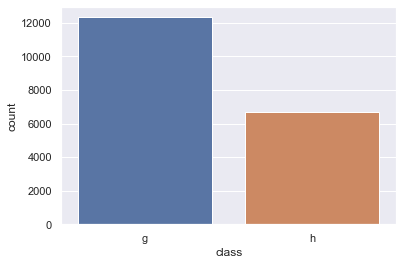

In [104]:
sns.set(style="darkgrid")
sns.countplot(x='class',data=df)

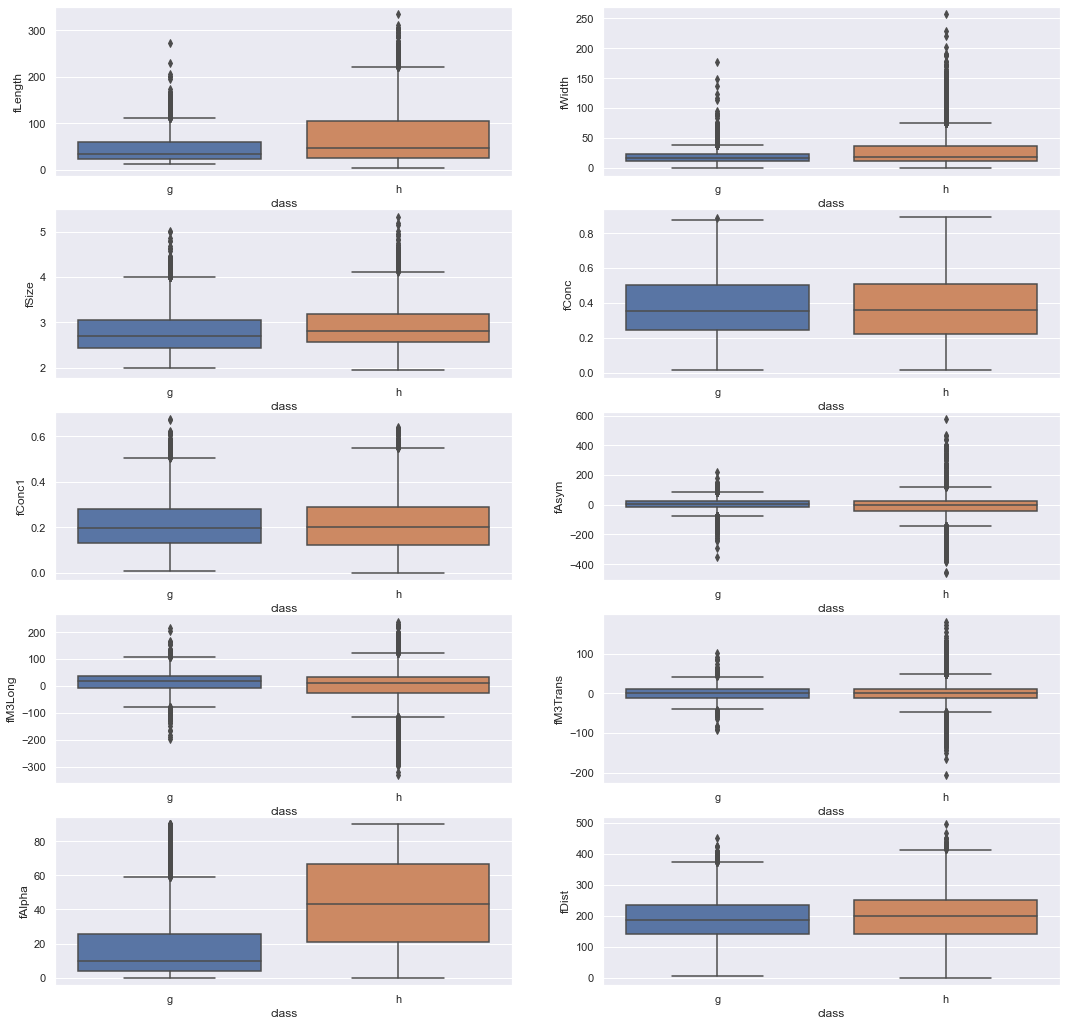

In [103]:
sns.set(style="darkgrid")
plt.subplots(figsize=(18, 18))
for j,i in enumerate(df.drop(columns='class').columns):
  plt.subplot(5,2,j+1)
  sns.boxplot(x='class',y=i,data=df)



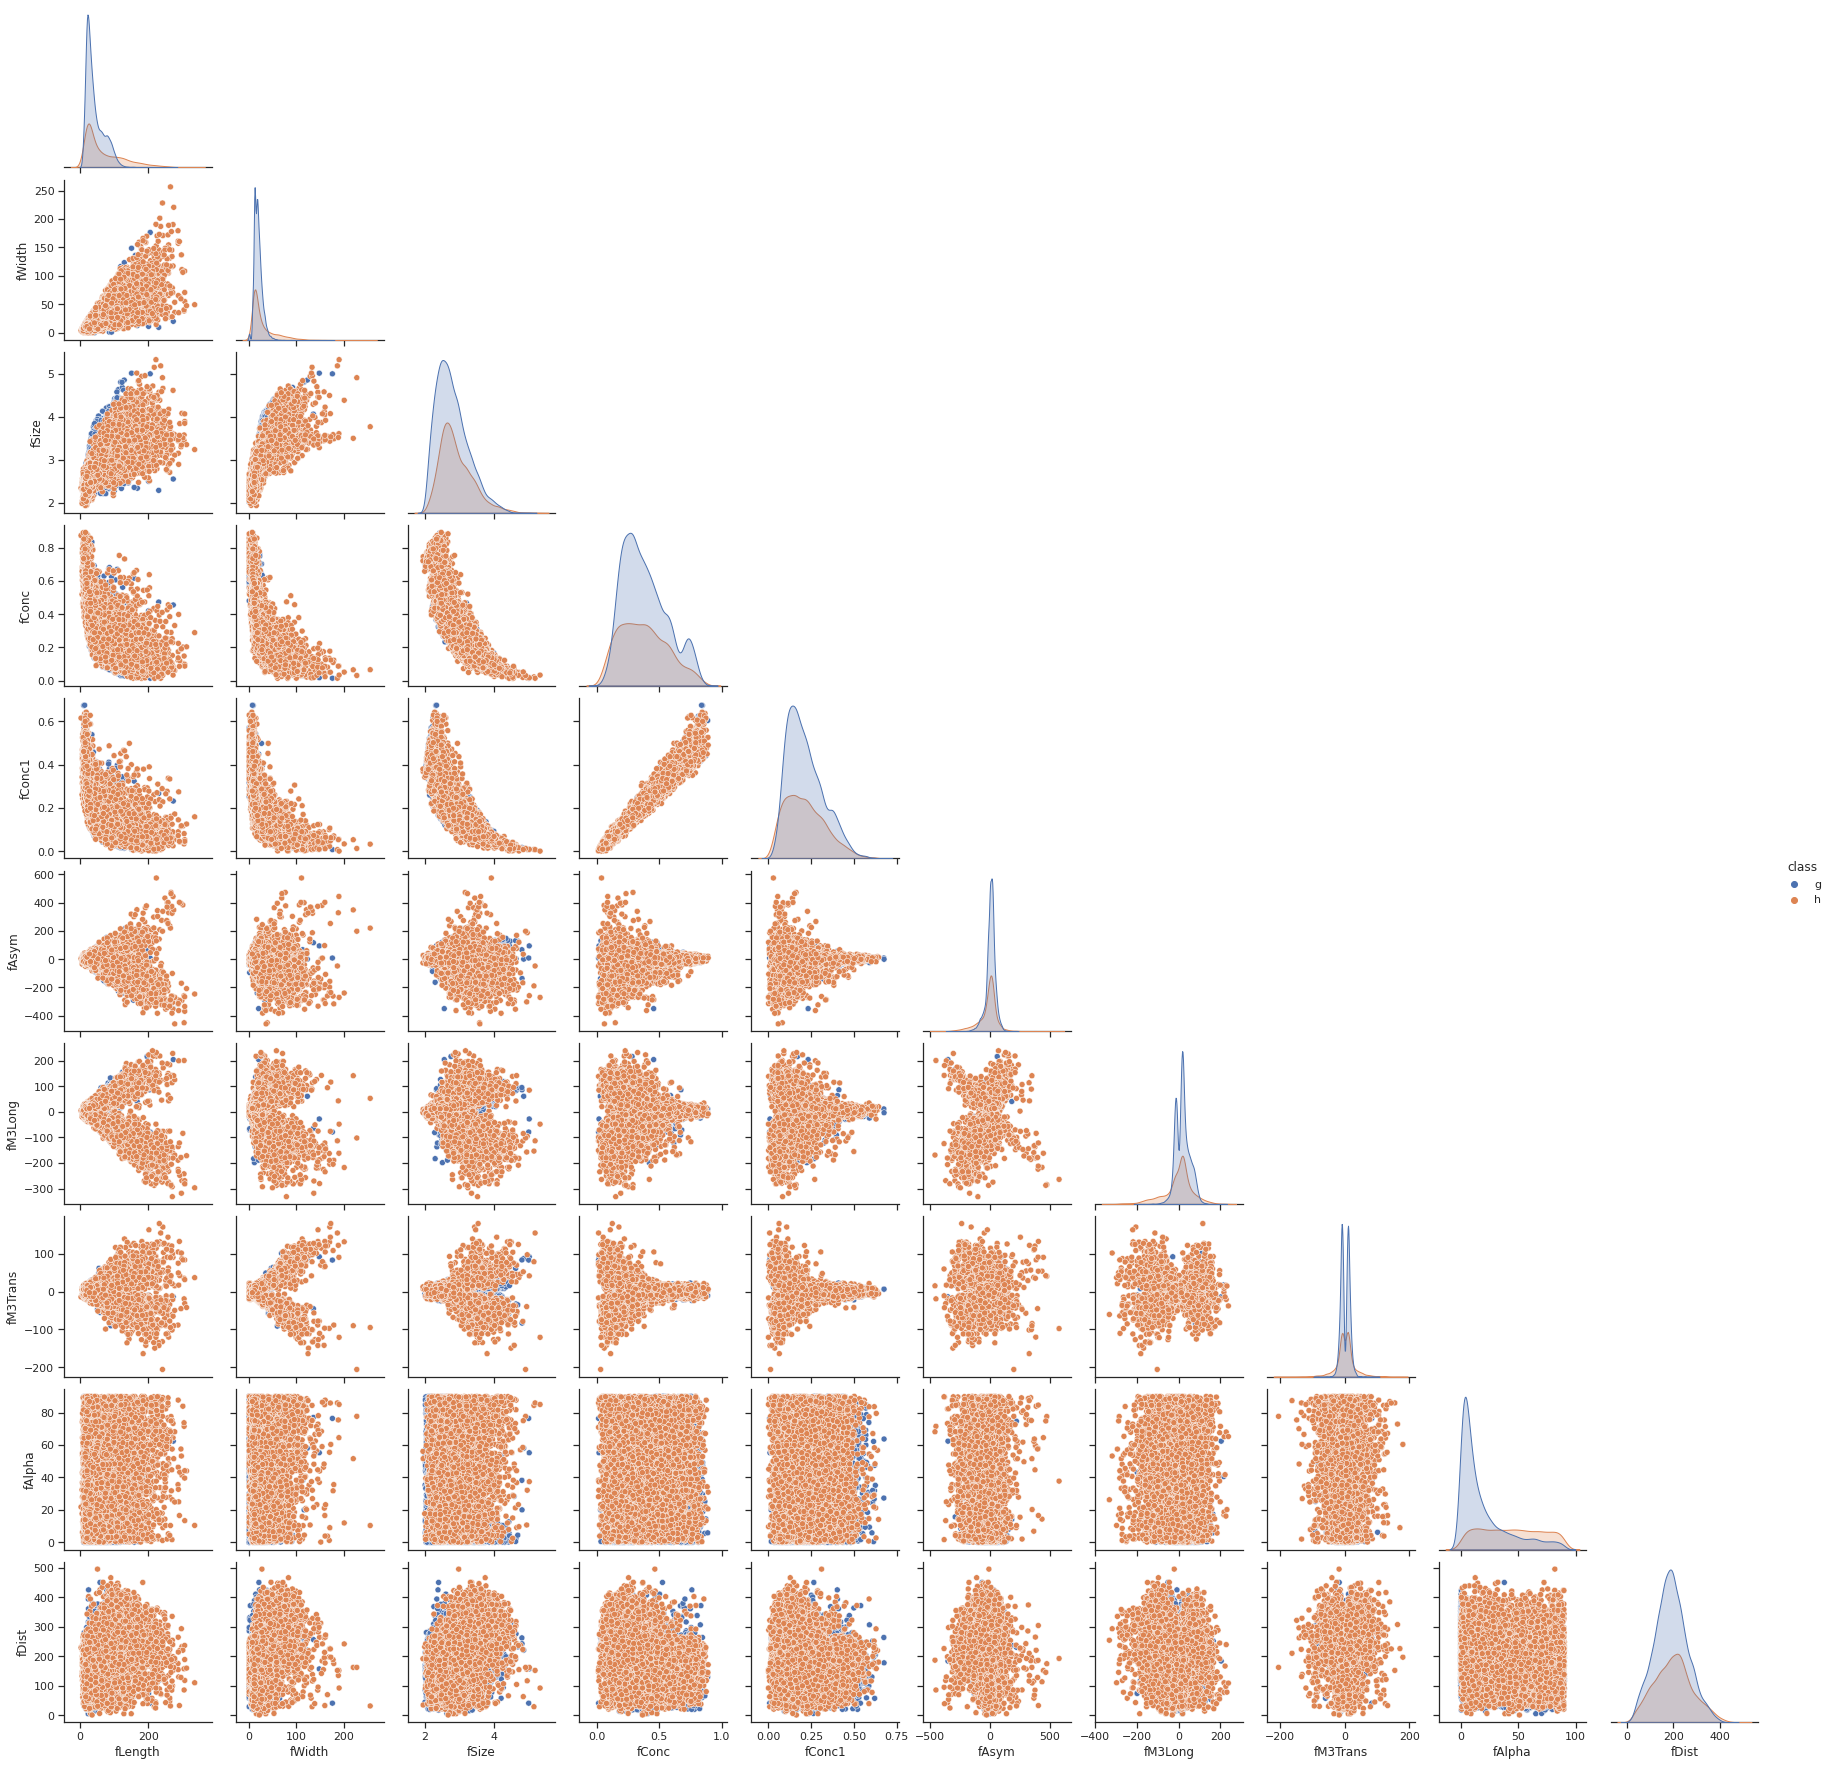

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="class", corner=True)

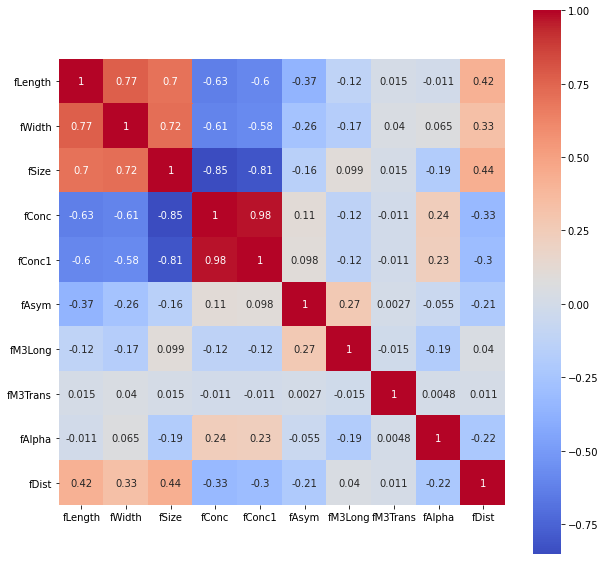

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')


In [4]:
df.drop(columns='fConc',inplace=True)

In [283]:
#instances corresponding to inliers
df.drop(columns='class')[(np.abs(stats.zscore(df.drop(columns='class'))) < 3).all(axis=1)]

,fLength,fWidth,fSize,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
3,23.8172,9.5728,2.3385,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
5,51.6240,21.1502,2.9085,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...
19012,31.8373,13.8734,2.8251,0.1988,-16.4919,-27.1448,11.1098,11.3663,100.0566
19014,43.2980,17.3545,2.8307,0.1646,-60.1842,-33.8513,-3.6545,78.4099,224.8299
19015,21.3846,10.9170,2.6161,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560


In [285]:
print(f"The number of outliers is {df.shape[0]-df.drop(columns='class')[(np.abs(stats.zscore(df.drop(columns='class'))) < 3).all(axis=1)].shape[0]}")

The number of outliers is 1181


In [296]:
df_inliers=df[(np.abs(stats.zscore(df.drop(columns='class'))) < 3).all(axis=1)]
print(f"number of gamma outliers is {df['class'].value_counts()[0]-df.loc[df_inliers.index,'class'].value_counts()[0]} and \
that of hadron {df['class'].value_counts()[1]-df.loc[df_inliers.index,'class'].value_counts()[1]}")


number of gamma outliers is 141 and that of hadron 1040


In [5]:
#Incoding target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [6]:
df['class'].value_counts()

0    12332
1     6573
Name: class, dtype: int64

In [10]:
X=df.iloc[:,:-1]
y=df['class']

In [11]:
#Standardize
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support,plot_confusion_matrix,f1_score,classification_report,roc_curve, auc
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC

from imblearn.over_sampling import SMOTE
stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y,random_state=42,test_size=0.2)

In [49]:
param_rfc={'rfc__n_estimators':[100,150,200],'rfc__criterion':['gini','entropy'],'rfc__max_features':['auto','sqrt'],'rfc__n_jobs':[-1],'rfc__random_state':[42],'rfc__max_depth':[None,20]}
model = Pipeline([
        ('sampling', SMOTE()),
        ('rfc', RandomForestClassifier())
    ])

In [50]:
grid_rfc = GridSearchCV(model, param_rfc, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_rfc.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': [None, 20],
                         'rfc__max_features': ['auto', 'sqrt'],
                         'rfc__n_estimators': [100, 150, 200],
                         'rfc__n_jobs': [-1], 'rfc__random_state': [42]},
             scoring='f1')

In [186]:
 grid_rfc.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': None,
 'rfc__max_features': 'sqrt',
 'rfc__n_estimators': 150,
 'rfc__n_jobs': -1,
 'rfc__random_state': 42}

In [52]:
param_dt={'dt__criterion':['gini','entropy'],'dt__splitter':['best','random'],'dt__max_features':['auto','sqrt'],'dt__random_state':[42],'dt__max_depth':[None,5,10,20]}
model_dt = Pipeline([
        ('sampling', SMOTE()),
        ('dt', DecisionTreeClassifier())
    ])

In [53]:
grid_dt = GridSearchCV(model_dt, param_dt, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 5, 10, 20],
                         'dt__max_features': ['auto', 'sqrt'],
                         'dt__random_state': [42],
                         'dt__splitter': ['best', 'random']},
             scoring='f1')

In [ ]:
grid_dt.best_params_

In [55]:
param_lr={'lr__penalty':['l1','l2'],'lr__solver':['lbfgs','liblinear'],'lr__C':np.logspace(-3,3,7),'lr__random_state':[42],'lr__n_jobs':[-1]}
model_lr = Pipeline([
        ('sampling', SMOTE()),
        ('lr', LogisticRegression())
    ])

In [56]:
grid_lr = GridSearchCV(model_lr, param_lr, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_lr.fit(X_train, y_train)

C:\Users\almou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.69993409 0.69616666 0.69790047        nan 0.70438147
 0.69896207 0.70049254        nan 0.70093222 0.70050013 0.70070681
        nan 0.69997945 0.70031006 0.69963694        nan 0.70098744
 0.70009938 0.70008037        nan 0.70057624 0.70004922 0.69921109
        nan 0.70098504 0.6999378  0.6996638 ]
  warnings.warn(
C:\Users\almou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'lr__n_jobs': [-1], 'lr__penalty': ['l1', 'l2'],
                         'lr__random_state': [42],
                         'lr__solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [187]:
grid_lr.best_params_

{'lr__C': 0.01,
 'lr__n_jobs': -1,
 'lr__penalty': 'l1',
 'lr__random_state': 42,
 'lr__solver': 'liblinear'}

In [80]:
param_linearsvc=[{'linearsvc__penalty':['l2'],'linearsvc__loss':['hinge','squared_hinge'],'linearsvc__C':np.logspace(-1,1,3),'linearsvc__random_state':[42],'linearsvc__max_iter':[1000000]},{'linearsvc__penalty':['l1'],'linearsvc__loss':['squared_hinge'],'linearsvc__C':np.logspace(-3,3,7),'linearsvc__random_state':[42],'linearsvc__max_iter':[1000000]}]
model_linearsvc = Pipeline([
        ('sampling', SMOTE()),
        ('linearsvc', LinearSVC())
    ])

In [81]:
grid_linearsvc = GridSearchCV(model_linearsvc, param_linearsvc, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_linearsvc.fit(X_train, y_train)

C:\Users\almou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70161124 0.70002129 0.70128158 0.70065578 0.70126906 0.70086257
        nan        nan        nan        nan        nan        nan
        nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('linearsvc', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'linearsvc__C': array([ 0.1,  1. , 10. ]),
                          'linearsvc__loss': ['hinge', 'squared_hinge'],
                          'linearsvc__max_iter': [1000000],
                          'linearsvc__penalty': ['l2'],
                          'linearsvc__random_state': [42]},
                         {'linearsvc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'linearsvc__loss': ['squared_hinge'],
                          'linearsvc__max_iter': [1000000],
                          'linearsvc__penalty': ['l1'],
                          'linearsvc__random_state': [42]}],
             scoring='f1')

In [83]:
grid_linearsvc.best_params_

{'linearsvc__C': 0.1,
 'linearsvc__loss': 'hinge',
 'linearsvc__max_iter': 1000000,
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': 42}

In [76]:
pa={'poly1__kernel':['poly'],'poly1__C':np.logspace(-3,3,7),'poly1__random_state':[42],'poly1__degree':[2,3,4]}
model_poly1 = Pipeline([
        ('sampling', SMOTE()),
        ('poly1', SVC())
    ])

In [77]:
grid_poly1 = GridSearchCV(model_poly1, pa, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_poly1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('poly1', SVC())]),
             n_jobs=-1,
             param_grid={'poly1__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'poly1__degree': [2, 3, 4], 'poly1__kernel': ['poly'],
                         'poly1__random_state': [42]},
             scoring='f1')

In [61]:
param_svc=[{'svc__kernel':['rbf','sigmoid'],'svc__C':np.logspace(-1,1,3),'svc__random_state':[42]},{'svc__kernel':['poly'],'svc__C':np.logspace(-1,1,3),'svc__random_state':[42],'svc__degree':[2,3,4]}]
model_svc = Pipeline([
        ('sampling', SMOTE()),
        ('svc', SVC())
    ])

In [62]:
grid_svc = GridSearchCV(model_svc, param_svc, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()), ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svc__kernel': ['rbf', 'sigmoid'],
                          'svc__random_state': [42]},
                         {'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'svc__degree': [2, 3, 4], 'svc__kernel': ['poly'],
                          'svc__random_state': [42]}],
             scoring='f1')

In [73]:
grid_svc.best_params_

{'svc__C': 10.0, 'svc__kernel': 'rbf', 'svc__random_state': 42}

In [84]:
param_knn={'knn__n_neighbors':[3,5,7],'knn__weights':['uniform','distance'],'knn__p':[1,2],'knn__n_jobs':[-1]}
model_knn = Pipeline([
        ('sampling', SMOTE()),
        ('knn', KNeighborsClassifier())
    ])

In [85]:
grid_knn = GridSearchCV(model_knn, param_knn, scoring='f1',n_jobs=-1,cv=stratified_kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_jobs': [-1], 'knn__n_neighbors': [3, 5, 7],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [188]:
grid_knn.best_params_

{'knn__n_jobs': -1,
 'knn__n_neighbors': 7,
 'knn__p': 1,
 'knn__weights': 'distance'}

In [88]:
y_pred_rfc=grid_rfc.predict(X_test)
y_pred_dt=grid_dt.predict(X_test)
y_pred_lr=grid_lr.predict(X_test)
y_pred_linearsvc=grid_linearsvc.predict(X_test)
y_pred_svc=grid_svc.predict(X_test)
y_pred_lda=grid_lda.predict(X_test)
y_pred_knn=grid_knn.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2466
           1       0.84      0.79      0.81      1315

    accuracy                           0.87      3781
   macro avg       0.87      0.85      0.86      3781
weighted avg       0.87      0.87      0.87      3781



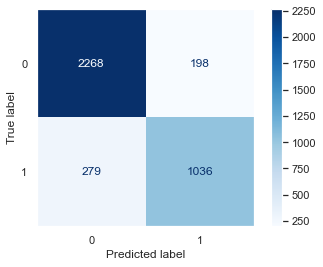

In [123]:
plot_confusion_matrix(grid_rfc, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

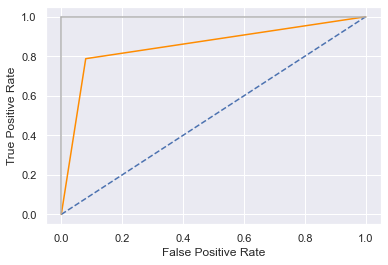

In [121]:
false_positive_rate_rfc, true_positive_rate_rfc, threshold_rfc = roc_curve(y_test, y_pred_rfc)
plt.plot(false_positive_rate_rfc, true_positive_rate_rfc,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [209]:
auc_value_rfc=auc(false_positive_rate_rfc, true_positive_rate_rfc)
f1_score_value_rfc=f1_score(y_test,y_pred_rfc)
auc_value_rfc

0.853770364408426

In [146]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2466
           1       0.76      0.75      0.76      1315

    accuracy                           0.83      3781
   macro avg       0.81      0.81      0.81      3781
weighted avg       0.83      0.83      0.83      3781



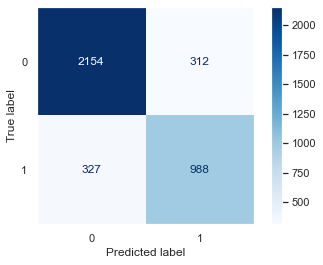

In [124]:
plot_confusion_matrix(grid_dt, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

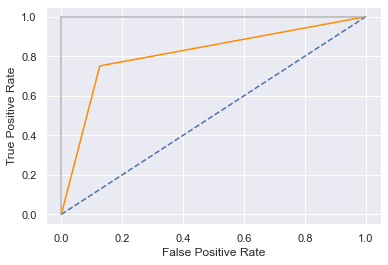

In [131]:
false_positive_rate_dt, true_positive_rate_dt, threshold_dt = roc_curve(y_test, y_pred_dt)
plt.plot(false_positive_rate_dt, true_positive_rate_dt,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [210]:
auc_value_dt=auc(false_positive_rate_dt, true_positive_rate_dt)
f1_score_value_dt=f1_score(y_test,y_pred_dt)
auc_value_dt

0.8124050586069403

In [147]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2466
           1       0.69      0.72      0.71      1315

    accuracy                           0.79      3781
   macro avg       0.77      0.77      0.77      3781
weighted avg       0.79      0.79      0.79      3781



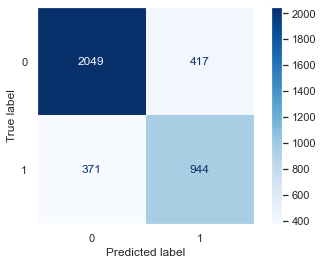

In [126]:
plot_confusion_matrix(grid_lr, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

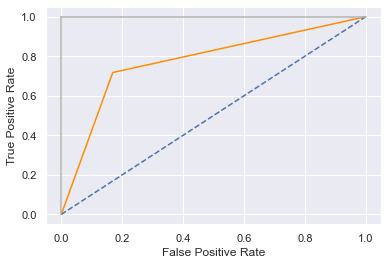

In [136]:
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(y_test, y_pred_lr)
plt.plot(false_positive_rate_lr, true_positive_rate_lr,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [211]:
auc_value_lr=auc(false_positive_rate_lr, true_positive_rate_lr)
f1_score_value_lr=f1_score(y_test,y_pred_lr)
auc_value_lr

0.7743854828712313

In [148]:
print(classification_report(y_test,y_pred_linearsvc))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2466
           1       0.70      0.72      0.71      1315

    accuracy                           0.79      3781
   macro avg       0.77      0.78      0.77      3781
weighted avg       0.80      0.79      0.79      3781



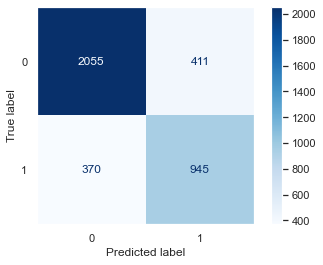

In [132]:
plot_confusion_matrix(grid_linearsvc, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

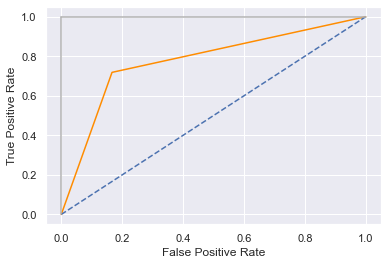

In [133]:

false_positive_rate_linearsvc, true_positive_rate_linearsvc, threshold_linearsvc = roc_curve(y_test, y_pred_linearsvc)

plt.plot(false_positive_rate_linearsvc, true_positive_rate_linearsvc,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [212]:
auc_value_linearsvc=auc(false_positive_rate_linearsvc, true_positive_rate_linearsvc)
f1_score_value_linearsvc=f1_score(y_test,y_pred_linearsvc)
auc_value_linearsvc

0.7759822560202789

In [149]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2466
           1       0.83      0.78      0.80      1315

    accuracy                           0.87      3781
   macro avg       0.86      0.85      0.85      3781
weighted avg       0.87      0.87      0.87      3781



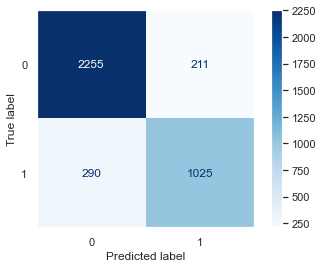

In [134]:
plot_confusion_matrix(grid_svc, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

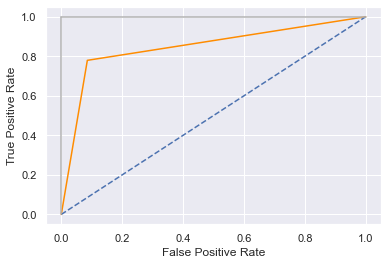

In [135]:
false_positive_rate_svc, true_positive_rate_svc, threshold_svc = roc_curve(y_test, y_pred_svc)
plt.plot(false_positive_rate_svc, true_positive_rate_svc,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [213]:
auc_value_svc=auc(false_positive_rate_svc, true_positive_rate_svc)
f1_score_value_svc=f1_score(y_test,y_pred_svc)
auc_value_svc

0.8469520073763642

In [150]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2466
           1       0.77      0.76      0.76      1315

    accuracy                           0.84      3781
   macro avg       0.82      0.82      0.82      3781
weighted avg       0.84      0.84      0.84      3781



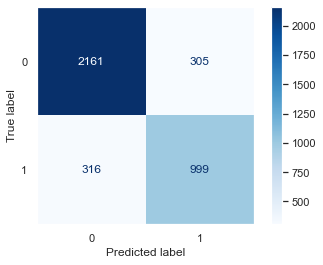

In [128]:
plot_confusion_matrix(grid_knn, X_test, y_test,cmap='Blues')
plt.grid(False)

Text(0.5, 0, 'False Positive Rate')

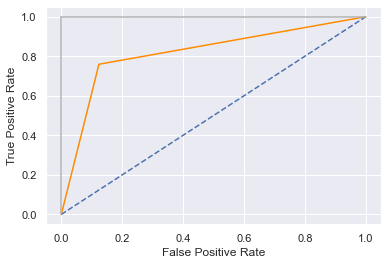

In [130]:
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test, y_pred_knn)
plt.plot(false_positive_rate_knn, true_positive_rate_knn,color='darkorange')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [214]:
auc_value_knn=auc(false_positive_rate_knn, true_positive_rate_knn)
f1_score_value_knn=f1_score(y_test,y_pred_knn)
auc_value_knn

0.8180068706268367

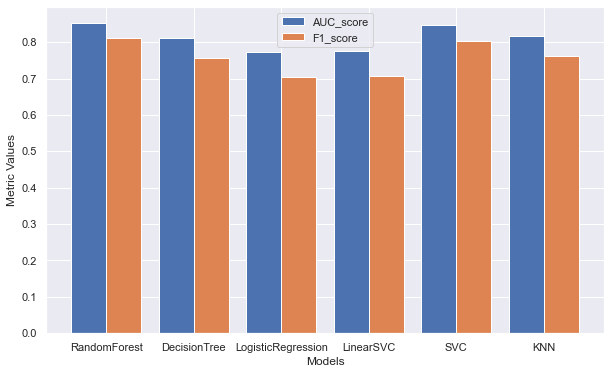

In [228]:
#F1 and AUC plot
names = ['RandomForest','DecisionTree','LogisticRegression','LinearSVC','SVC','KNN']
auc_values_all = [auc_value_rfc,auc_value_dt,auc_value_lr,auc_value_linearsvc,auc_value_svc,auc_value_knn]
f1_score_all = [f1_score_value_rfc,f1_score_value_dt,f1_score_value_lr,f1_score_value_linearsvc,f1_score_value_svc,f1_score_value_knn]
X_axis = np.arange(len(names))
plt.subplots(figsize=(10, 6))
plt.bar(X_axis - 0.2, auc_values_all, 0.4, label = 'AUC_score')
plt.bar(X_axis + 0.2, f1_score_all, 0.4, label = 'F1_score')
plt.xticks(X_axis, names)
plt.ylabel("Metric Values")
plt.xlabel("Models")
plt.legend()
plt.show()

In [225]:
ranf=RandomForestClassifier(n_estimators=150,criterion='entropy',max_features='sqrt')
ranf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=150)

In [247]:
f1_score(y_test,ranf.predict(X_test))

0.812603648424544

<BarContainer object of 9 artists>

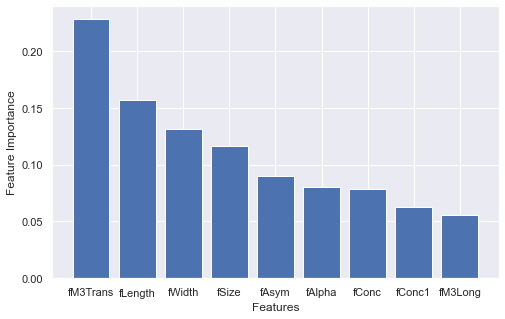

In [227]:
#Feature Importance
l=sorted(zip(feature_names, ranf.feature_importances_), key=lambda x: x[1],reverse=True)
top_features=list(map(lambda x:x[0],l))
importance=list(map(lambda x:x[1],l))
fig = plt.figure(figsize = (8, 5))
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.bar(top_features, importance)